In [282]:
# Imports

import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt


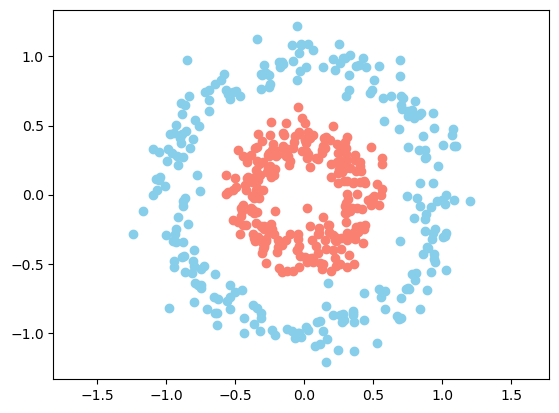

In [283]:
# Creation of the dataset

from sklearn.datasets import make_circles

n = 500

X, Y = make_circles(n_samples=n, factor=0.4, noise=0.1)

p = X.shape[1] # 2 features

plt.figure()
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')
plt.axis('equal')
plt.show()



In [284]:
# Class of a layer of the neural network

class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_fn):
        
        self.act_fn = act_fn
        
        self.W = 2 * np.random.rand(n_conn, n_neur) - 1
        self.b = 2 * np.random.rand(1, n_neur) - 1

In [285]:
# Activation functions

sigmoid_fn = (lambda x: 1.0 / (1.0 + np.exp(-x)), 
              lambda x: sigmoid_fn[0](x) * (1 - sigmoid_fn[0](x)))

In [286]:

sigmoid_fn[1](1)

0.19661193324148185

In [287]:
# Loss functions

l2_cost_fn = (lambda yp, yr: 0.5 * (yp - yr) ** 2, 
              lambda yp, yr: yp-yr)

In [288]:
def create_nn(topology, act_fn):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_fn))
    
    return nn


In [289]:

topology = [p, 4, 5, 1] # number of neurons in each layer

neural_net = create_nn(topology, sigmoid_fn)
neural_net

In [290]:
def train(neural_net, X, Y, loss, lr=0.1, epochs=1):
    
    epoch = 1
    
    while epoch <= epochs:
        
        epoch = epoch + 1
        
        if epoch % 50 == 0:
            
            print("epoch: " + str(epoch))
    
        for x, y in zip(X, Y):
        
            out = [(None, x.reshape(1, x.shape[0]))]
            
            # Fordward pass
            
            # z = x @ neural_net[0].W + neural_net[0].b
            # a = neural_net[0].act_fn(z)
            
            for layer in neural_net:
                
                a = out[-1][1]
                
                z = a @ layer.W + layer.b
                a = layer.act_fn[0](z)
                
                out.append((z, a))
            
            # Backpropagation
            
            for l in reversed(range(len(neural_net))):

                z = out[l+1][0]
                a = out[l+1][1]
                
                if l + 1 == len(neural_net):
                
                    delta = loss[1](a, y) * neural_net[l].act_fn[1](z)
                    
                else:
                    
                    delta = (delta @ _W.T) * neural_net[l].act_fn[1](z)
                    
                _W = neural_net[l].W    
                
                dCdW = out[l][1].T @ delta
                dCdb = delta
                
                neural_net[l].W = neural_net[l].W - lr*dCdW
                neural_net[l].b = neural_net[l].b - lr*dCdb
            

In [291]:
train(neural_net, X, Y, l2_cost_fn, epochs=100)

epoch: 50
epoch: 100


In [292]:
def predict(neural_net, X, round=True):
    
    Yp = []
    
    for x in X:
        
        out = [(None, x.reshape(1, x.shape[0]))]
        
        # Fordward pass
        
        # z = x @ neural_net[0].W + neural_net[0].b
        # a = neural_net[0].act_fn(z)
        
        for layer in neural_net:
            
            a = out[-1][1]
            
            z = a @ layer.W + layer.b
            a = layer.act_fn[0](z)
            
            out.append((z, a))
            
        Yp.append(out[-1][1][0][0])
    
    Yp = np.array(Yp)
    
    if round:
        Yp = np.round(Yp).astype(int)
    return Yp

In [293]:
Yp = predict(neural_net, X)

acc = np.sum(Yp == Y) / Y.shape[0]
print("Train acc = " + str(acc))

Train acc = 0.998


In [319]:
Xtest, Ytest = make_circles(n_samples=200, factor=0.4, noise=0.13)

In [320]:
Yp = predict(neural_net, Xtest)

In [321]:
acc = np.sum(Yp == Ytest) / Ytest.shape[0]
print("Test acc = " + str(acc))

Test acc = 0.985


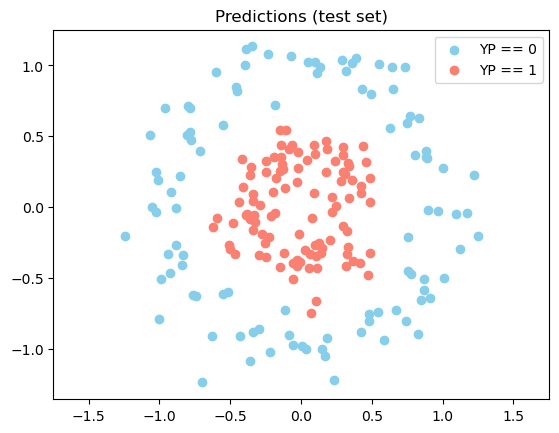

In [322]:
plt.figure()
plt.scatter(Xtest[Yp == 0, 0], Xtest[Yp == 0, 1], c='skyblue', label='YP == 0')
plt.scatter(Xtest[Yp == 1, 0], Xtest[Yp == 1, 1], c='salmon', label='YP == 1')
plt.axis('equal')
plt.legend()
plt.title('Predictions (test set)')
plt.show()

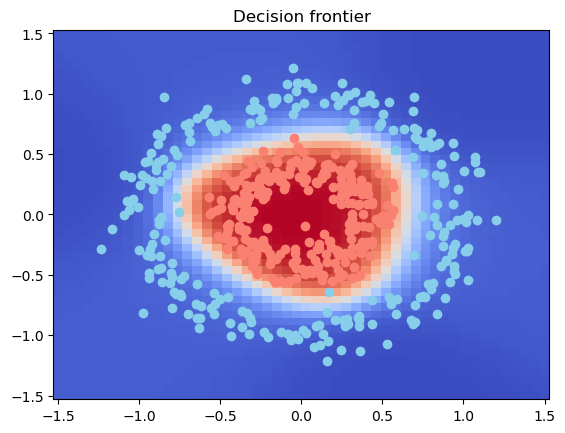

In [323]:
res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_Y = np.zeros((res,res))

for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        
        _Y[i0, i1] = predict(neural_net, np.array([[x0, x1]]), round=False)
        
plt.figure()
plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')
# plt.axis('equal')
plt.title('Decision frontier')
plt.show()